In [1]:
import tensorflow as tf
from keras import models, layers, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os

directory = "D:/Documentos/Proyectos/LEGO/"
dataset_directory = directory + "dataset/"
folder = directory +"folder/"
train_dir =folder +"train/"
test_dir = folder +"test/"
validation_dir = folder +"validation/"

os.chdir(directory)

# EDA 
Vamos a hacer un poco de exploración del tipo de imágenes y clases que tenemos

In [2]:
#cargamos el .txt con el nombre de las piezas para validar (test)
data = pd.read_csv("validation.txt", header = None)
data.head()

,0
0,14719 flat tile corner 2x2 000R.png
1,14719 flat tile corner 2x2 000L.png
2,14719 flat tile corner 2x2 001R.png
3,14719 flat tile corner 2x2 001L.png
4,14719 flat tile corner 2x2 002R.png


In [3]:
#eliminamos los ultimos 9 carácteres de cada nombre para extraer los nombres de las clases y creamos columna nueva
data[1] = data[0].str[:-9]
data[1]

0       14719 flat tile corner 2x2
1       14719 flat tile corner 2x2
2       14719 flat tile corner 2x2
3       14719 flat tile corner 2x2
4       14719 flat tile corner 2x2
                   ...            
7995    99301 roof tile inside 3x3
7996    99301 roof tile inside 3x3
7997    99301 roof tile inside 3x3
7998    99301 roof tile inside 3x3
7999    99301 roof tile inside 3x3
Name: 1, Length: 8000, dtype: object

In [4]:
#ponemos nombres a las columnas
data.columns = ["image", "class"]

In [5]:
labels = data["class"].value_counts().index

In [6]:
# hay 160 imagenes test para cada clase
data["class"].value_counts()

3659 brick bow 1x4                     160
43857 beam 1x2                         160
3045 roof corner outside tile 2x2      160
15672 roof tile 1x2                    160
41678 Cross Block Fork 2x2             160
3003 brick 2x2                         160
3063 Curved Brick 2 Knobs              160
3794 Plate 1X2 with 1 Knob             160
3040 roof tile 1x2                     160
2780 Peg with friction                 160
33909 plate 2 knobs 2x2                160
3062 Round Brick 1x1                   160
3038 roof tile 2x3                     160
3046 roof corner inside tile 2x2       160
3070 Flat Tile 1x1                     160
3675 roof tile outside 3x3             160
2420 plate corner 2x2                  160
4150 flat tile round 2x2               160
14719 flat tile corner 2x2             160
3001 brick 2x4                         160
3037 roof tile 1x4                     160
99301 roof tile inside 3x3             160
3005 brick 1x1                         160
18654 beam 

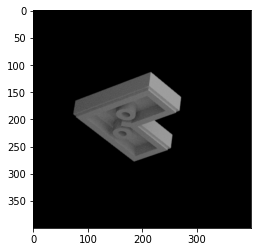

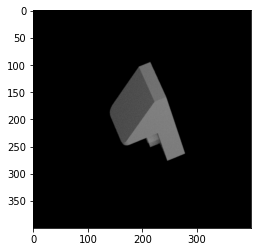

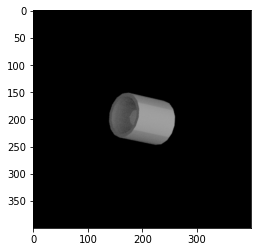

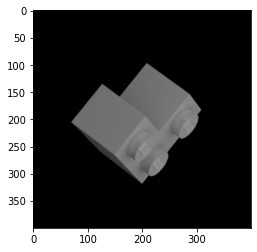

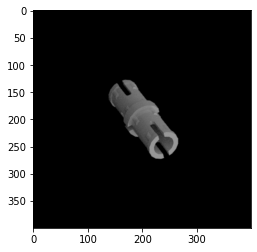

In [7]:
os.chdir(dataset_directory)

#mostramos algunos ejemplos de imágenes
%matplotlib inline

for i in range(48,4050,1000):
    img = mpimg.imread(os.listdir()[i])
    imgplot = plt.imshow(img)
    plt.show()

### Distribuimos el set de imágenes en Train, Validation y Test y sus carpetas correspondientes

In [8]:
os.chdir(directory)
#creamos una carpeta folder donde distribuiremos nuestro train y test
os.mkdir("folder")
#creamos las carpetas para el train y para el test
os.chdir(folder)
os.mkdir("train")
os.mkdir("test")
os.mkdir("validation")

In [9]:
#dentro de cada carpeta creamos las carpetas para las diferentes clases de piezas
os.chdir(train_dir)
for element in labels:
    os.mkdir(element)

os.chdir(test_dir)
for element in labels:
    os.mkdir(element)
    
os.chdir(validation_dir)
for element in labels:
    os.mkdir(element)

In [10]:
#importamos shutil para copiar y distribuir las imágenes
import shutil
os.chdir(dataset_directory)

#TRAIN (32000 imágenes)
for element in os.listdir():
    if element not in data["image"].values:
        foto = dataset_directory + element
        fold = element[:-9]
        dest = shutil.copy(foto, train_dir + fold)

#Hacemos un train-test split del 40% para repartir las imágenes haciendo uso de scickit-learn
X = data["image"]
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

#TEST (4800 imágenes) me baso en la información del dataframe para localizarlas
for element in X_test:
    foto = dataset_directory + element
    fold = data[data["image"] == element]["class"].values[0]
    dest = shutil.copy(foto, test_dir + fold)

#VALIDATION (3200 imágenes)
for element in X_train:
    foto = dataset_directory + element
    fold = data[data["image"] == element]["class"].values[0]
    dest = shutil.copy(foto, validation_dir + fold)

Este proceso de distribución va lentísimo, se podría optimizar el código

### Data Augmentation con ImageDataGenerator

In [15]:
# creamos un generador para mostrar ejemplos de lo que hace
os.chdir(dataset_directory)

datagen = ImageDataGenerator(rotation_range=40,# valor entre 0 y 180 que harà rotar de forma random las imagenes
                             width_shift_range=0.2, # transladar la imagen horizontalmente
                             height_shift_range=0.2,# transladar la imagen verticalmente
                             shear_range=0.2, # sharing transformations (aplicaciones lineales)
                             zoom_range=0.2, # hacer zoom a la imagen
                             horizontal_flip=True, # hacer el espejo
                             channel_shift_range = 0.4, #modifica los colores (no veo el efecto)
                             brightness_range= [0.2, 1.8], #modifica el brillo (no veo el efecto)
                             fill_mode='nearest')# la forma de rellenar los pixeles que quedan vacios tras las transformaciones                            

img = image.load_img("14719 flat tile corner 2x2 040L.png")
# convertimos la imagen en un numpy array
x = image.img_to_array(img)
print(x.shape)
#Reshape a (1, 400, 400, 3) tensor, para que datagen.flow lo entienda
x = x.reshape((1,) + x.shape)
print(x.shape)

(400, 400, 3)
(1, 400, 400, 3)


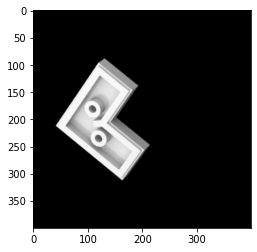

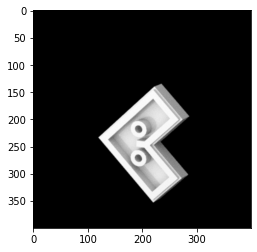

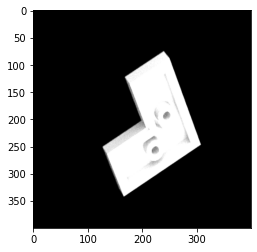

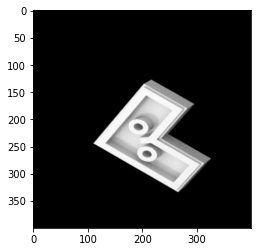

In [16]:
# mostramos unos ejemplos de data augmentation
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4 == 0:
        break        
plt.show()

Haciendo uso de ImageDataGenerator vamos a crear nuevas imagenes (Data Augmentation) para que nuestro modelo se entrene con ellas y sea más genérico. Para aumentar la precisión del modelo he elegido solo los parámetros de deformación que tienen sentido, ya que las piezas de lego son universales y no tiene sentido aplicarles desproporciones. 

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,    # reescalamos por el camino
                                   rotation_range=90,  # para orientaciones random de las imágenes
                                   width_shift_range=0.02, # width y heigh shift range para descentralizar las imagenes
                                   height_shift_range=0.02,
                                   brightness_range=[0.7,1.3], # para que el modelo pueda identificar otros colores y ayúde al experimento
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

#el generador de validación y el test solo lo utilizaremos para reescalar 
validation_datagen = ImageDataGenerator(rescale=1./255)    

test_datagen = ImageDataGenerator(rescale=1./255)

#definimos el parametro del tamaño de imagen y batch_size por si hay que hacer ajustes
img_size = 200
batch_size = 100

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_size,img_size), # reducimos tamaño por el camino
                                                    batch_size = batch_size,
                                                    class_mode="categorical")

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=(img_size,img_size),
                                                              batch_size=batch_size,
                                                              class_mode="categorical")

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_size,img_size),
                                                  batch_size=batch_size,
                                                  class_mode="categorical")

Found 32000 images belonging to 50 classes.
Found 3200 images belonging to 50 classes.
Found 4800 images belonging to 50 classes.


# CNN

In [18]:
model = models.Sequential()
#primera capa convolucional (identifica lineas verticales, horizontales y patrones geometricos simples)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
#segunda capa convolucional (features mas deeps de cada pieza)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#tercera capa convolucional (magia)
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#cuarta capa convolucional (magia)
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


#Flatten
model.add(layers.Flatten())

#1 capa neuronal
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))    # añadimos un dropout regularizador   
#output
model.add(layers.Dense(50, activation='softmax')) #calcula las probs de pertenecer a las diferentes clases


#enganchamos las capas          
model.compile(loss="categorical_crossentropy",    #tenemos varias clases
             optimizer="adam",               #combina gradient descent with momentum y RMSprop
             metrics=["accuracy"])

In [19]:
#mostramos la estructura del modelo      
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 256)       2

In [20]:
#importamos un EarlyStopping para que el modelo deje de entrenarse si no mejora
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5) 
#si tras 5 epochs no ha mejorado la función de coste del validation, parará el entrenamiento

In [21]:
# numero total de imagenes_train dividido por el batch batch size 
steps_per_epoch = 32000//batch_size
# numero total de imagenes_validation dividido por el batch batch size 
validation_steps = 3200//batch_size

#entrenamos el modelo
history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch, 
                    validation_data=validation_generator,
                    validation_steps=validation_steps, 
                    epochs=100,
                    callbacks=[early_stop])                    

Epoch 1/100
320/320 [==============================] - 231s 722ms/step - loss: 2.5785 - accuracy: 0.2323 - val_loss: 1.8703 - val_accuracy: 0.3947
Epoch 2/100
320/320 [==============================] - 230s 719ms/step - loss: 1.8303 - accuracy: 0.4023 - val_loss: 1.3834 - val_accuracy: 0.5441
Epoch 3/100
320/320 [==============================] - 231s 721ms/step - loss: 1.4732 - accuracy: 0.5027 - val_loss: 1.1450 - val_accuracy: 0.6137
Epoch 4/100
320/320 [==============================] - 230s 718ms/step - loss: 1.2584 - accuracy: 0.5662 - val_loss: 0.9528 - val_accuracy: 0.6722
Epoch 5/100
320/320 [==============================] - 230s 718ms/step - loss: 1.1287 - accuracy: 0.6004 - val_loss: 0.9012 - val_accuracy: 0.6672
Epoch 6/100
320/320 [==============================] - 230s 718ms/step - loss: 1.0311 - accuracy: 0.6299 - val_loss: 0.7596 - val_accuracy: 0.7287
Epoch 7/100
320/320 [==============================] - 230s 718ms/step - loss: 0.9525 - accuracy: 0.6540 - val_loss: 0

### EVALUATION

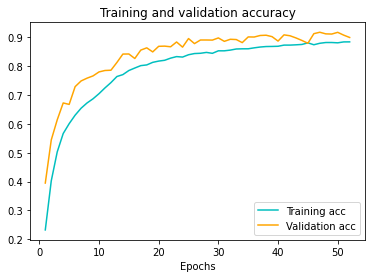

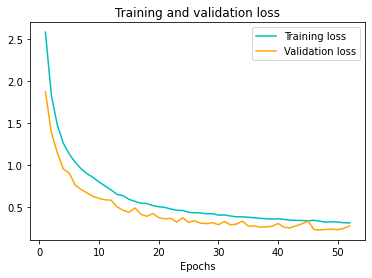

In [22]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) +1)

#graficamos la evolucion del entrenamiento
plt.plot(epochs, acc ,"c", label="Training acc")
plt.plot(epochs, val_acc, "orange", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.figure()
plt.plot(epochs, loss ,"c", label="Training loss")
plt.plot(epochs, val_loss, "orange", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [23]:
#ahora evaluamos nuestro set de test_images originales, sin image generator
steps=4800//batch_size
test_loss, test_acc = model.evaluate(test_generator, steps=steps) 
print("Test Accuracy ---> ", test_acc)

48/48 [==============================] - 8s 166ms/step - loss: 0.2638 - accuracy: 0.9029
Test Accuracy --->  0.902916669845581


In [24]:
# Guardamos el Modelo
os.chdir(directory)
model.save('LEGO_CNN.h5')

### GRIDSEARCH (futuros ajustes)
Se podria añadir un GridSearch de la libreria Scikit-learn para escanear los hiperparámetros más óptimos para el modelo

### EXPERIMENT

Vamos a ver que tal se desenvuelve nuestro modelo clasificando imagenes home made de piezas de lego reales !!!.  
Las imágenes las he tomado con mi teléfono y les he reducido el brillo para homogeneizar el fondo.

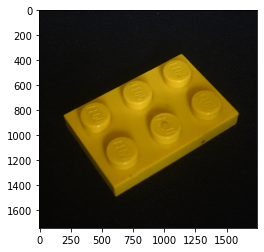

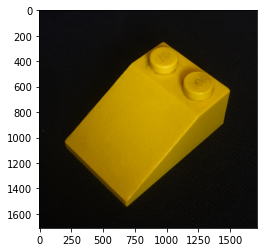

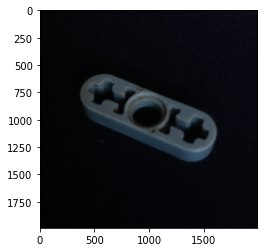

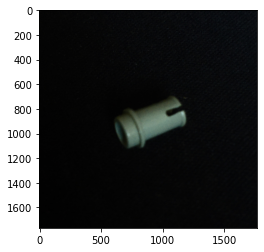

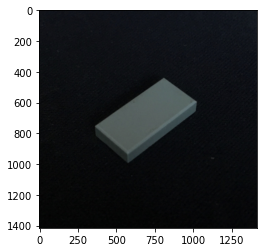

In [25]:
trained_dir = directory + "experiment/Trained_classes/"
new_dir = directory + "experiment/New_classes/"
os.chdir(trained_dir)
    
#mostramos las imagenes del experimento
for pic in os.listdir():
    img = mpimg.imread(pic)
    imgplot = plt.imshow(img)
    plt.show()

In [27]:
#hacemos uso de la libreria PIL para reshapear nuestras imagenes al input del modelo
from PIL import Image

#recuperamos el nombre de las clases desde imagedatagenerator en forma de lista
label_map = (train_generator.class_indices)
clases = list(label_map.keys())

for pic in os.listdir():
    img = Image.open(pic) 
    img = img.resize((img_size, img_size), Image.ANTIALIAS)
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    #predecimos la clase con el modelo
    pob_predict = model.predict(x)
    class_predict = np.argmax(model.predict(x), axis=-1)
    clase = class_predict[0]
    print (clases[clase])

99301 roof tile inside 3x3
99301 roof tile inside 3x3
3002 brick 2x3
3010 brick 1x4
3002 brick 2x3


El modelo parece tener dificultades para interpretar las imágenes reales, probablemente los colores le confundan, el siguiente paso será procesar las imágenes para asemejarlas lo máximo posible a las piezas renderizadas.

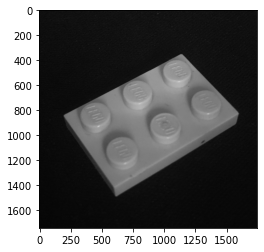

(1, 200, 200, 3)
99301 roof tile inside 3x3


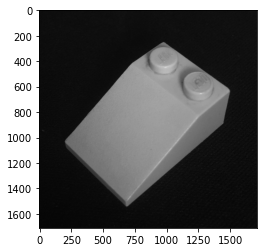

(1, 200, 200, 3)
99301 roof tile inside 3x3


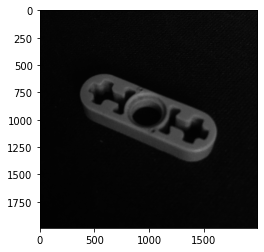

(1, 200, 200, 3)
3002 brick 2x3


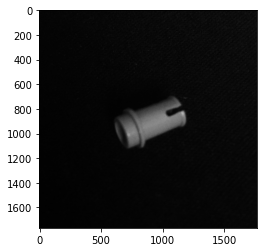

(1, 200, 200, 3)
3010 brick 1x4


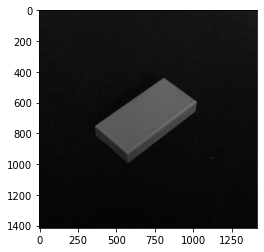

(1, 200, 200, 3)
3001 brick 2x4


In [63]:
# pasamos las imágenes a blanco y negro
rgb_weights = [0.2989, 0.5870, 0.1140]

for pic in os.listdir():
    img = Image.open(pic).convert("LA").convert('RGB')
    imgplot = plt.imshow(img)
    plt.show()
   
    img = img.resize((img_size, img_size), Image.ANTIALIAS)
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    print(x.shape)
    
    #predecimos la clase con el modelo
    pob_predict = model.predict(x)
    class_predict = np.argmax(model.predict(x), axis=-1)
    clase = class_predict[0]
    print (clases[clase])